# Packages

In [29]:
import os
from glob import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

ModuleNotFoundError: No module named 'seaborn'

# Reading Data

## NIH CXR8 Dataset

In [19]:
NIH_filepath = r'C:\Users\gdlar\Downloads\Files\NIH - ChestX-ray8 Database\images'

In [20]:
df1 = pd.read_csv(r'C:\Users\gdlar\Downloads\Files\NIH - Data_Entry_2017_v2020.csv')
df1 = df1[~df1['Finding Labels'].str.contains("\|")].reset_index(drop = False)
df1 = df1[['Image Index', 'Finding Labels']]
df1 = df1.rename(columns={"Image Index": "Image Name", "Finding Labels": "Disease"})
df1['Image Filepath'] = ''
for i in range(len(df1)):
  # df1['Image Filepath'][i] = r'C:\Users\gdlar\Downloads\Files\NIH -  ChestX-ray8 Database\images\\' + df1["Image Name"][i]
  df1['Image Filepath'][i] = os.path.join( NIH_filepath, df1['Image Name'][i])
  if df1["Disease"][i] == 'No Finding':
    df1["Disease"][i] = 'Normal'
df1.head()

,Image Name,Disease,Image Filepath
0,00000001_000.png,Cardiomegaly,C:\Users\gdlar\Downloads\Files\NIH - ChestX-ra...
1,00000002_000.png,Normal,C:\Users\gdlar\Downloads\Files\NIH - ChestX-ra...
2,00000003_001.png,Hernia,C:\Users\gdlar\Downloads\Files\NIH - ChestX-ra...
3,00000003_002.png,Hernia,C:\Users\gdlar\Downloads\Files\NIH - ChestX-ra...
4,00000003_004.png,Hernia,C:\Users\gdlar\Downloads\Files\NIH - ChestX-ra...


In [21]:
df1['Disease'].value_counts()

Normal                60361
Infiltration           9547
Atelectasis            4215
Effusion               3955
Nodule                 2705
Pneumothorax           2194
Mass                   2139
Consolidation          1310
Pleural_Thickening     1126
Cardiomegaly           1093
Emphysema               892
Fibrosis                727
Edema                   628
Pneumonia               322
Hernia                  110
Name: Disease, dtype: int64

## Large Dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images

Create a dataframe that has the disease, image name, and image filepath

In [5]:
df2 = pd.DataFrame(columns=['Disease', 'Image Name', 'Image Filepath'])

# assign directory
directorys = [r'C:\Users\gdlar\Downloads\Files\Large Dataset of OCT and Chest X-ray images\chest_xray\test\NORMAL',
              r'C:\Users\gdlar\Downloads\Files\Large Dataset of OCT and Chest X-ray images\chest_xray\test\PNEUMONIA',
              r'C:\Users\gdlar\Downloads\Files\Large Dataset of OCT and Chest X-ray images\chest_xray\train\NORMAL',
              r'C:\Users\gdlar\Downloads\Files\Large Dataset of OCT and Chest X-ray images\chest_xray\train\PNEUMONIA']
 
# iterate over files in
# that directory
for i in range(len(directorys)):
  for filename in os.listdir(directorys[i]):
      f = os.path.join(directorys[i], filename)
      contents = {'Disease': filename.split('-')[0],
                'Image Name': filename,
                'Image Filepath': f}
      # checking if it is a file
      if os.path.isfile(f):
        # Don't include DS Store files
        if filename.split('-')[0] != '.DS_Store':
          df2 = df2.append(contents, ignore_index=True)


# Rename Bacteria and Virus Pneumonia to be grouped togetger
df2['Disease'] = np.where(df2['Disease'] == "BACTERIA", 'Pneumonia', df2['Disease'])
df2['Disease'] = np.where(df2['Disease'] == "VIRUS", 'Pneumonia', df2['Disease'])
df2['Disease'] = np.where(df2['Disease'] == "NORMAL", 'Normal', df2['Disease'])

C:\Users\gdlar\AppData\Local\Temp\ipykernel_29940\579623176.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(contents, ignore_index=True)
C:\Users\gdlar\AppData\Local\Temp\ipykernel_29940\579623176.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(contents, ignore_index=True)
C:\Users\gdlar\AppData\Local\Temp\ipykernel_29940\579623176.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(contents, ignore_index=True)
C:\Users\gdlar\AppData\Local\Temp\ipykernel_29940\579623176.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(contents, ignore_index=True)
C:\Users

In [11]:
df2['Disease'].value_counts()

Pneumonia    4273
Normal       1583
Name: Disease, dtype: int64

## COVID 19 Chest X-ray Dataset (Kaggle)

In [1]:
# !git clone https://github.com/ieee8023/covid-chestxray-dataset # only need to download once

In [8]:
# !pip -q install torchxrayvision #only install once

In [9]:
import torchxrayvision as xrv
d = xrv.datasets.COVID19_Dataset(imgpath="covid-chestxray-dataset/images/",csvpath="covid-chestxray-dataset/metadata.csv")

In [10]:
# construct the path to the metadata CSV file and load it
csvPath = os.path.sep.join(["covid-chestxray-dataset", "metadata.csv"])
df = pd.read_csv(csvPath)

In [11]:
# construct the path to the metadata CSV file and load it
csvPath = os.path.sep.join(["covid-chestxray-dataset", "metadata.csv"])
df = pd.read_csv(csvPath)
df3 = pd.DataFrame(columns=['Disease', 'Image Name', 'Image Filepath'])
# loop over the rows of the COVID-19 data frame
for i in range(len(df)):
    # if (1) the current case is not COVID-19 or (2) this is not
    # a 'PA' view, then ignore the row
    if df["view"][i] == "PA":
      # build the path to the input image file
      imagePath = os.path.sep.join(['covid-chestxray-dataset', "images", df["filename"][i]])

      # if the input image file does not exist (there are some errors in
      # the COVID-19 metadeta file), ignore the row
      if os.path.exists(imagePath):

        # extract the filename from the image path and then construct the
        # path to the copied image file
        filename = df["filename"][i].split(os.path.sep)[-1]

      # Relabel
        if df["finding"][i] == 'Pneumonia/Viral/COVID-19':
          df["finding"][i] = 'COVID-19'

        contents = {'Disease': df["finding"][i],
                    'Image Name': filename,
                    'Image Filepath': imagePath}

        # Don't include todo, or no finding cases
        if df["finding"][i] not in ('todo', "No Finding"):
          df3 = df3.append(contents, ignore_index=True)

In [12]:
df3 = df3.query('Disease == "COVID-19" | Disease == "Pneumonia"')
df3.Disease.value_counts()

COVID-19     196
Pneumonia     38
Name: Disease, dtype: int64

In [13]:
df3['Disease'].value_counts()

COVID-19     196
Pneumonia     38
Name: Disease, dtype: int64

## COVID-QU-Ex Dataset

In [14]:
df4 = pd.DataFrame(columns=['Disease', 'Image Name', 'Image Filepath'])

directorys = [r'C:\Users\gdlar\Downloads\Files\COVID-QU-Ex Dataset\Lung Segmentation Data\Lung Segmentation Data\Test\COVID-19\images',     #Not really sure what the difference was, but loads
              r'C:\Users\gdlar\Downloads\Files\COVID-QU-Ex Dataset\Lung Segmentation Data\Lung Segmentation Data\Train\COVID-19\images',
              r'C:\Users\gdlar\Downloads\Files\COVID-QU-Ex Dataset\Lung Segmentation Data\Lung Segmentation Data\Val\COVID-19\images',
              r'C:\Users\gdlar\Downloads\Files\COVID-QU-Ex Dataset\Lung Segmentation Data\Lung Segmentation Data\Test\Non-COVID\images',
              r'C:\Users\gdlar\Downloads\Files\COVID-QU-Ex Dataset\Lung Segmentation Data\Lung Segmentation Data\Train\Non-COVID\images',
              r'C:\Users\gdlar\Downloads\Files\COVID-QU-Ex Dataset\Lung Segmentation Data\Lung Segmentation Data\Val\Non-COVID\images',
              r'C:\Users\gdlar\Downloads\Files\COVID-QU-Ex Dataset\Lung Segmentation Data\Lung Segmentation Data\Test\Normal\images',
              r'C:\Users\gdlar\Downloads\Files\COVID-QU-Ex Dataset\Lung Segmentation Data\Lung Segmentation Data\Train\Normal\images',
              r'C:\Users\gdlar\Downloads\Files\COVID-QU-Ex Dataset\Lung Segmentation Data\Lung Segmentation Data\Val\Normal\images']
 
# iterate over files in
# that directory
for i in range(len(directorys)):
  for filename in os.listdir(directorys[i]):
    if i < 3:
      disease = 'COVID-19'
    elif i >= 3 and i < 6:
      disease = 'Pneumonia'
    else:
      disease = 'Normal'

    f = os.path.join(directorys[i], filename)
    contents = {'Disease': disease,
            'Image Name': filename,
            'Image Filepath': f}
    # checking if it is a file
    if os.path.isfile(f):
    # Don't include DS Store files
        df4 = df4.append(contents, ignore_index=True)

In [15]:
# df4 Disease 

df4['Disease'].value_counts()

COVID-19     11989
Pneumonia    11273
Normal       10068
Name: Disease, dtype: int64

## Chest X-ray Images (Pneumonia)
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

Same data as the OCT and Chest-xray dataset, so we should only use one

In [16]:
# df5 = pd.DataFrame(columns=['Disease', 'Image Name', 'Image Filepath'])

# directorys = ['/content/drive/MyDrive/Colab Notebooks/Project Data/Chest X-Ray Images (Pneumonia)/chest_xray/test/NORMAL',
#               '/content/drive/MyDrive/Colab Notebooks/Project Data/Chest X-Ray Images (Pneumonia)/chest_xray/train/NORMAL',
#               '/content/drive/MyDrive/Colab Notebooks/Project Data/Chest X-Ray Images (Pneumonia)/chest_xray/val/NORMAL',
#               '/content/drive/MyDrive/Colab Notebooks/Project Data/Chest X-Ray Images (Pneumonia)/chest_xray/test/PNEUMONIA',
#               '/content/drive/MyDrive/Colab Notebooks/Project Data/Chest X-Ray Images (Pneumonia)/chest_xray/train/PNEUMONIA',
#               '/content/drive/MyDrive/Colab Notebooks/Project Data/Chest X-Ray Images (Pneumonia)/chest_xray/val/PNEUMONIA']
 
# # iterate over files in
# # that directory
# for i in range(len(directorys)):
#   for filename in os.listdir(directorys[i]):
#     if i < 3:
#       disease = 'Normal'
#     else:
#       disease = 'Pneumonia'

#     f = os.path.join(directorys[i], filename)
#     contents = {'Disease': disease,
#             'Image Name': filename,
#             'Image Filepath': f}
#     # checking if it is a file
#     if os.path.isfile(f):

#     # Don't include DS Store files
#       df5 = df5.append(contents, ignore_index=True)

In [17]:
# df5['Disease'].value_counts()

## Joining all data together

In [22]:
df = pd.concat([df1, df2, df3, df4]).reset_index(drop=True)

In [23]:
#not normal disease count
df['Disease'].value_counts()[1::].sum()

58732

In [24]:
#normal disease count
df['Disease'].value_counts()[0]

72012

In [25]:
df.head()

,Image Name,Disease,Image Filepath
0,00000001_000.png,Cardiomegaly,C:\Users\gdlar\Downloads\Files\NIH - ChestX-ra...
1,00000002_000.png,Normal,C:\Users\gdlar\Downloads\Files\NIH - ChestX-ra...
2,00000003_001.png,Hernia,C:\Users\gdlar\Downloads\Files\NIH - ChestX-ra...
3,00000003_002.png,Hernia,C:\Users\gdlar\Downloads\Files\NIH - ChestX-ra...
4,00000003_004.png,Hernia,C:\Users\gdlar\Downloads\Files\NIH - ChestX-ra...


# Creates Binary Dataset File structure for Keras

No need to run code if it's commented out, the file structure has been created and code in for reference

In [26]:
df.head()

,Image Name,Disease,Image Filepath
0,00000001_000.png,Cardiomegaly,C:\Users\gdlar\Downloads\Files\NIH - ChestX-ray8 Database\images\00000001_000.png
1,00000002_000.png,Normal,C:\Users\gdlar\Downloads\Files\NIH - ChestX-ray8 Database\images\00000002_000.png
2,00000003_001.png,Hernia,C:\Users\gdlar\Downloads\Files\NIH - ChestX-ray8 Database\images\00000003_001.png
3,00000003_002.png,Hernia,C:\Users\gdlar\Downloads\Files\NIH - ChestX-ray8 Database\images\00000003_002.png
4,00000003_004.png,Hernia,C:\Users\gdlar\Downloads\Files\NIH - ChestX-ray8 Database\images\00000003_004.png


In [91]:
dest_file = os.path.join(binary_directory,  df['Image Name'][0])
print(dest_file)

C:\Users\gdlar\Downloads\Files\BinaryData\00000001_000.png


In [104]:
# binary_directory = r"C:\Users\gdlar\Downloads\Files\BinaryData" for G computer
binary_directory = r"C:\Users\gdlar\Google Drive\Colab Notebooks\BinaryData" #For Sharing


# C:\Users\gdlar\Google Drive\Colab Notebooks\BinaryData
# Google Drive/Colab Notebooks/BinaryData

In [105]:
os.path.join(binary_directory, 'Normal', df['Image Name'][0])

'C:\\Users\\gdlar\\Google Drive\\Colab Notebooks\\BinaryData\\Normal\\00000001_000.png'

In [33]:
from shutil import copyfile #Will only run once (here for reference)
import os
from os.path import exists

In [106]:
from shutil import copyfile #Will only run once (here for reference)
import os
from os.path import exists

count = 0
not_count = 0

for x in range(len(df)):
    try:
        if df['Disease'][x] == 'Normal':

            count = count + 1 #should match normal from value_counts above
            src_file = df['Image Filepath'][x]
            # dest_file = binary_directory + r"\Normal\\" + df['Image Name'][x]
            dest_file = os.path.join(binary_directory, 'Normal', df['Image Name'][x])
            if os.path.exists(dest_file):
                # print('FileExsists')
                pass
            else:
                copyfile(src_file, dest_file)
        else:
            not_count = not_count +1
            src_file = df['Image Filepath'][x]
            # dest_file = binary_directory + r"\NotNormal\\" + df['Image Name'][x]
            dest_file = os.path.join(binary_directory, 'NotNormal',  df['Image Name'][x])
            if os.path.exists(dest_file):
                # print('FileExsists')
                pass
            else:
                copyfile(src_file, dest_file)
    except IOError as e:
        print(e)
print(count, ' ', not_count)

C:\Users\gdlar\Downloads\Files\BinaryData\Normal\Normal (999).png
72012   58732


In [ ]:
pd.set_option("max_colwidth", None)
df[df['Image Name'].str.contains('3936')]

,Image Name,Disease,Image Filepath
12760,00003936_000.png,Normal,/content/drive/MyDrive/Colab Notebooks/Project Data/NIH - ChestX-ray8 Database/images/00003936_000.png
46346,00013936_000.png,Infiltration,/content/drive/MyDrive/Colab Notebooks/Project Data/NIH - ChestX-ray8 Database/images/00013936_000.png
46347,00013936_001.png,Infiltration,/content/drive/MyDrive/Colab Notebooks/Project Data/NIH - ChestX-ray8 Database/images/00013936_001.png
46348,00013936_002.png,Normal,/content/drive/MyDrive/Colab Notebooks/Project Data/NIH - ChestX-ray8 Database/images/00013936_002.png
76719,00023936_000.png,Normal,/content/drive/MyDrive/Colab Notebooks/Project Data/NIH - ChestX-ray8 Database/images/00023936_000.png
94895,VIRUS-4453936-0001.jpeg,Pneumonia,/content/drive/MyDrive/Colab Notebooks/Project Data/Large Dataset of OCT and Chest X-ray images/chest_xray/train/PNEUMONIA/VIRUS-4453936-0001.jpeg
109540,non_COVID (3936).png,Pneumonia,/content/drive/MyDrive/Colab Notebooks/Project Data/COVID-QU-Ex Dataset/Lung Segmentation Data/Lung Segmentation Data/Test/Non-COVID/images/non_COVID (3936).png
125660,Normal (3936).png,Normal,/content/drive/MyDrive/Colab Notebooks/Project Data/COVID-QU-Ex Dataset/Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (3936).png


# Creates MultiClass file strucutre for Keras

In [36]:
class_list = df.Disease.unique().tolist()
class_list

['Cardiomegaly',
 'Normal',
 'Hernia',
 'Infiltration',
 'Nodule',
 'Emphysema',
 'Effusion',
 'Atelectasis',
 'Mass',
 'Pneumothorax',
 'Pleural_Thickening',
 'Fibrosis',
 'Consolidation',
 'Edema',
 'Pneumonia',
 'COVID-19']

In [41]:
import splitfolders
normal_file_path = r"C:\Users\gdlar\Downloads\Files\BinaryData"
multi_reduced_file_path = r"C:\Users\gdlar\Downloads\Files\Multiclass"

splitfolders.ratio(normal_file_path, output=multi_reduced_file_path,
                   seed=1337, ratio = (.75, .15, .10), group_prefix = None, move=False)

Copying files: 130738 files [04:15, 511.27 files/s]


In [80]:
multidirectory = r"C:\Users\gdlar\Downloads\Files\Multiclass"
dest_file = os.path.join(multidirectory, 'Normal', df['Image Name'][x])
dest_file

'C:\\Users\\gdlar\\Downloads\\Files\\Multiclass\\Normal\\Normal (999).png'

In [76]:
binary_local = r"C:\Users\gdlar\Downloads\Files\Multiclass\Split\train"
src_file = os.path.join(binary_local, 'NotNormal',  df['Image Name'][x])
src_file

'C:\\Users\\gdlar\\Downloads\\Files\\Multiclass\\Split\\train\\NotNormal\\Normal (999).png'

In [81]:
#Probably a library for this, but wrote it out manually
count=0
p_count=0
c_count=0
i_count=0
a_count=0
e_count=0
n_count=0
pneum_count=0
o_count = 0

# Sorts files and copies them into multiclass categories for structure requried for Keras (only needs to run once :))

for x in range(len(df)):
    src_file = os.path.join(binary_local, 'NotNormal',  df['Image Name'][x])
    try:
        if df['Disease'][x] == 'Normal':
            count = count + 1 #should match normal from value_counts above
            # src_file = df['Image Filepath'][x]
            # src_file = os.path.join(multidirectory, 'NotNormal',  df['Image Name'][x])
            dest_file = os.path.join(multidirectory, 'Normal',  df['Image Name'][x])
            # dest_file = multidirectory + "/Normal/" + df['Image Name'][x]
            copyfile(src_file, dest_file)
        elif df['Disease'][x] == 'Pneumonia':
            p_count = p_count + 1 #should match normal from value_counts above
            # src_file = df['Image Filepath'][x]
            # dest_file = multidirectory + "/Pneumonia/" + df['Image Name'][x]
            dest_file = os.path.join(multidirectory, 'Pneumonia',  df['Image Name'][x])
            copyfile(src_file, dest_file)
        elif df['Disease'][x] == 'COVID-19':
            c_count = c_count + 1 #should match normal from value_counts above
            # src_file = df['Image Filepath'][x]
            # dest_file = multidirectory + "/COVID-19/" + df['Image Name'][x]
            dest_file = os.path.join(multidirectory, 'COVID-19',  df['Image Name'][x])
            copyfile(src_file, dest_file)
        # elif df['Disease'][x] == 'Infiltration':
        #     i_count = i_count + 1 #should match normal from value_counts above
        #     # src_file = df['Image Filepath'][x]
        #     # dest_file = multidirectory + "/Infiltration/" + df['Image Name'][x]
        #     dest_file = os.path.join(multidirectory, 'Infiltration',  df['Image Name'][x])
        #     copyfile(src_file, dest_file)
        # elif df['Disease'][x] == 'Atelectasis':
        #     a_count = a_count + 1 #should match normal from value_counts above
        #     # src_file = df['Image Filepath'][x]
        #     # dest_file = multidirectory + "/Atelectasis/" + df['Image Name'][x]
        #     dest_file = os.path.join(multidirectory, 'Atelectasis',  df['Image Name'][x])
        #     copyfile(src_file, dest_file)
        # elif df['Disease'][x] == 'Effusion':
        #     e_count = e_count + 1 #should match normal from value_counts above
        #     # src_file = df['Image Filepath'][x]
        #     # dest_file = multidirectory + "/Effusion/" + df['Image Name'][x]
        #     dest_file = os.path.join(multidirectory, 'Effusion',  df['Image Name'][x])
        #     copyfile(src_file, dest_file)
        # elif df['Disease'][x] == 'Nodule':
        #     n_count = n_count + 1 #should match normal from value_counts above
        #     # src_file = df['Image Filepath'][x]
        #     # dest_file = multidirectory + "/Nodule/" + df['Image Name'][x]
        #     dest_file = os.path.join(multidirectory, 'Nodule',  df['Image Name'][x])
        #     copyfile(src_file, dest_file)
        # elif df['Disease'][x] == 'Pneumothorax':
        #     pneum_count = pneum_count + 1 #should match normal from value_counts above
        #     # src_file = df['Image Filepath'][x]
        #     # dest_file = multidirectory + "/Pneumothorax/" + df['Image Name'][x]
        #     dest_file = os.path.join(multidirectory, 'Pneumothorax',  df['Image Name'][x])
        #     copyfile(src_file, dest_file)
        else:
            o_count = o_count + 1 #should match normal from value_counts above
            # src_file = df['Image Filepath'][x]
            # dest_file = multidirectory + "/Other/" + df['Image Name'][x]
            dest_file = os.path.join(multidirectory, 'Other',  df['Image Name'][x])
            copyfile(src_file, dest_file)
    except IOError as e:
        # print(e)
        pass
# print(count,  ' '  ,p_count,  ' ' ,c_count,  ' '  ,i_count,  ' '  ,a_count,  ' '  ,e_count,  ' '  ,n_count,  ' '  ,pneum_count,  ' '  ,o_count)

## Split folders into smaller amounts to allow for for easier computation

In [16]:
# !pip install split_folders

  Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)


In [18]:
import splitfolders
normal_file_path = r"C:\Users\gdlar\Downloads\Files\BinaryData"
multi_reduced_file_path = r"C:\Users\gdlar\Downloads\Files\Multiclass\Split"

splitfolders.ratio(normal_file_path, output=multi_reduced_file_path,
                   seed=1337, ratio = (.8, .1, .1), group_prefix = None, move=False)

KeyboardInterrupt: 

In [22]:
import splitfolders
normal_file_path = r"C:\Users\gdlar\Downloads\Files\BinaryData"
binary_reduced_file_path = r"C:\Users\gdlar\Downloads\Files\Binary_Split"

splitfolders.ratio(normal_file_path, output=binary_reduced_file_path,
                   seed=1337, ratio = (.70, .15, .15), group_prefix = None, move=False)

# EDA

In [28]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df,
    x='Disease',
    palette='Set1',
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,
                      horizontalalignment='right',
                      fontweight='light',
                      fontsize='x-large')
chart.set(
    title="Count of Images by Disease Type")
None

NameError: name 'sns' is not defined

<Figure size 720x360 with 0 Axes>

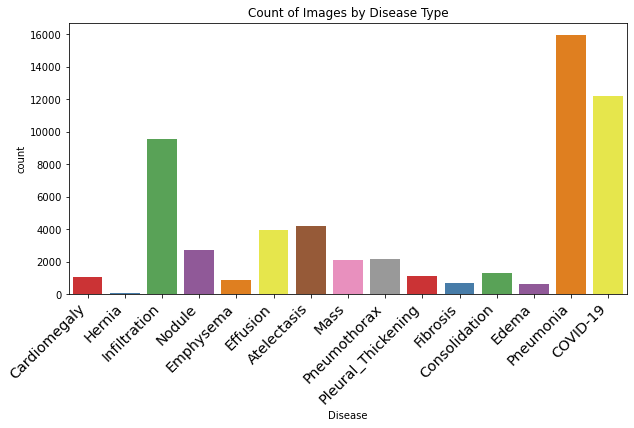

In [30]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df[df['Disease'] != 'Normal'],
    x='Disease',
    palette='Set1',
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,
                      horizontalalignment='right',
                      fontweight='light',
                      fontsize='x-large')
chart.set(
    title="Count of Images by Disease Type")
None

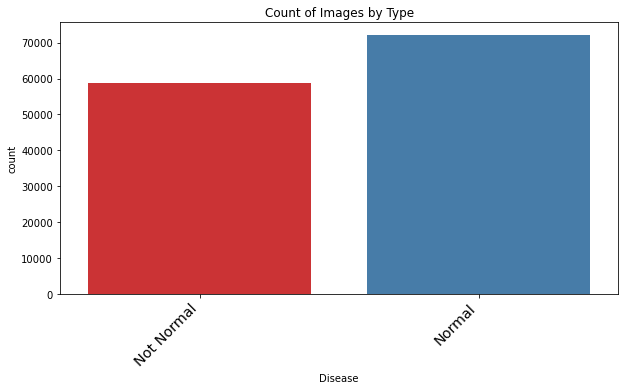

In [31]:
temp = df.copy()
temp['Disease'] = np.where(temp['Disease'] != "Normal", 'Not Normal', temp['Disease'])

plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=temp,
    x='Disease',
    palette='Set1',
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,
                      horizontalalignment='right',
                      fontweight='light',
                      fontsize='x-large')
chart.set(
    title="Count of Images by Type")
None

In [32]:
temp['Disease'].value_counts()

Normal        72012
Not Normal    58732
Name: Disease, dtype: int64

In [33]:
multi_df = df
multi_df['Disease'].value_counts() #numerical form of graph

Normal                72012
Pneumonia             15906
COVID-19              12185
Infiltration           9547
Atelectasis            4215
Effusion               3955
Nodule                 2705
Pneumothorax           2194
Mass                   2139
Consolidation          1310
Pleural_Thickening     1126
Cardiomegaly           1093
Emphysema               892
Fibrosis                727
Edema                   628
Hernia                  110
Name: Disease, dtype: int64

In [34]:
multi_df['Disease'].value_counts()[-11:] #Bottom portion of disease list - Thinking might not be enough data would have to work with oversampling or other approach type

Effusion              3955
Nodule                2705
Pneumothorax          2194
Mass                  2139
Consolidation         1310
Pleural_Thickening    1126
Cardiomegaly          1093
Emphysema              892
Fibrosis               727
Edema                  628
Hernia                 110
Name: Disease, dtype: int64

In [ ]:
multi_df['Disease'].value_counts()[1:5:].sum() #top 4 diseases sum (excluding normal)

41853